<a href="https://colab.research.google.com/github/archana3001/Course-Mastering-Stat-proba/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall sklearn -y
!pip install Cython
!pip install https://github.com/Santosh-Gupta/scikit-learn/archive/master.zip

  Using cached https://github.com/Santosh-Gupta/scikit-learn/archive/master.zip


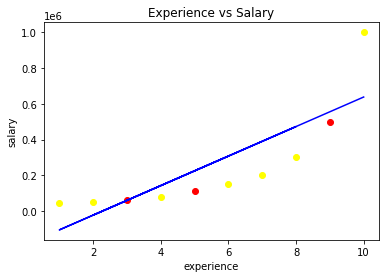

coefficients :  [[82522.42152466]]
mean square error :  5459476822.712437
score :  0.8588877328994488
accuracy :  85.89 %


In [ ]:
#required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#importing dataset
dataset=pd.read_csv("/content/Position_Salaries.csv")
x=dataset.iloc[:,1:2].values #position level 2nd column
y=dataset.iloc[:, 2:].values #salary 3rd column

#split data set into test and training data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=0)

#fitting simple Linear regression to training set
regressor=LinearRegression()
regressor.fit(x_train,y_train)

#predicting
y_pred=regressor.predict(x_test)

#validating result
plt.scatter(x_train, y_train, color='yellow') #train data
plt.scatter(x_test, y_test, color='red') #test data
plt.plot(x_train, regressor.predict(x_train), color='blue') #linear regression line
plt.title("Experience vs Salary")
plt.ylabel("salary")
plt.xlabel("experience")
plt.show()

#regression coefficient
print("coefficients : ", regressor.coef_)

#mean sqaure error
print("mean square error : ", np.mean((regressor.predict(x_test)-y_test)**2))

# variance score here 1 means perfect prediction
print("score : ", regressor.score(x_test, y_test))

#accuracy
print("accuracy : ", round(((regressor.score(x_test, y_test))*100),2), "%")

In [3]:
#Predicting Stock Closing Price using multiple features
#import
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

#extract required features
dataset=pd.read_csv('/content/sample_data/Google_Stock_Price_Train.csv') #train data set
#first convert date to some integer values
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date']=dataset['Date'].map(dt.datetime.toordinal)
dataset['Volume']=dataset['Volume'].str.replace('£', '').str.replace(',','')

#all column to numeric value
dataset['Close']=pd.to_numeric(dataset['Close'], errors='coerce')
dataset['Open']=pd.to_numeric(dataset['Open'], errors='coerce')
dataset['High']=pd.to_numeric(dataset['High'], errors='coerce')
dataset['Low']=pd.to_numeric(dataset['Low'], errors='coerce')
dataset['Volume']=pd.to_numeric(dataset['Volume'], errors='coerce').astype('Int64')

#detecting null column if any
#print(dataset['Close'].isnull().sum()) #no of empty Close column

#removing null columns
dataset.dropna()
print(dataset)

#finding null data set and filling
dataset.isnull().sum()
median_close=math.floor(dataset.Close.median())
median_close
dataset.Close=dataset.Close.fillna(median_close)
dataset.isnull().sum()

reg=linear_model.LinearRegression()
reg.fit(dataset[['Open','High','Low','Volume']],dataset[['Close']])


        Date    Open    High     Low   Close    Volume
0     734505  325.25  332.83  324.97  663.59   7380500
1     734506  331.27  333.87  329.08  666.45   5749400
2     734507  329.83  330.75  326.89  657.21   6590300
3     734508  328.34  328.77  323.68  648.24   5405900
4     734511  322.04  322.29  309.46  620.76  11688800
...      ...     ...     ...     ...     ...       ...
1253  736321  790.90  792.74  787.28  789.91    623400
1254  736325  790.68  797.86  787.66  791.55    789100
1255  736326  793.70  794.23  783.20  785.05   1153800
1256  736327  783.33  785.93  778.92  782.79    744300
1257  736328  782.75  782.78  770.41  771.82   1770000

[1258 rows x 6 columns]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
#test set extraction
testset=pd.read_csv('/content/sample_data/Google_Stock_Price_Test.csv') #test data set

#first convert date to some integer values
testset['Date'] = pd.to_datetime(testset['Date'])
testset['Date']=testset['Date'].map(dt.datetime.toordinal)
testset['Volume']=testset['Volume'].str.replace('£', '').str.replace(',','')

testset['Close']=pd.to_numeric(testset['Close'], errors='coerce')
testset['Open']=pd.to_numeric(testset['Open'], errors='coerce')
testset['High']=pd.to_numeric(testset['High'], errors='coerce')
testset['Low']=pd.to_numeric(testset['Low'], errors='coerce')
testset['Volume']=pd.to_numeric(testset['Volume'], errors='coerce')

#deleting duplicates
testset.isnull().sum()
testset

,Date,Open,High,Low,Close,Volume
0,736332,778.81,789.63,775.80,786.14,1657300
1,736333,788.36,791.34,783.16,786.90,1073000
2,736334,786.08,794.48,785.02,794.02,1335200
3,736335,795.26,807.90,792.20,806.15,1640200
4,736338,806.40,809.97,802.83,806.65,1272400
5,736339,807.86,809.13,803.51,804.79,1176800
6,736340,805.00,808.15,801.37,807.91,1065900
7,736341,807.14,807.39,799.17,806.36,1353100
8,736342,807.48,811.22,806.69,807.88,1099200
9,736346,807.08,807.14,800.37,804.61,1362100


In [6]:
#predicting
y_pred=reg.predict(testset[['Open','High','Low','Volume']])
y_pred

array([[706.61649824],
       [726.79945374],
       [730.0959029 ],
       [701.54157091],
       [745.96486715],
       [752.04233067],
       [742.98400007],
       [735.61374103],
       [761.46941043],
       [745.84693437],
       [755.44277724],
       [735.16570692],
       [763.3608791 ],
       [704.09924941],
       [749.49871817],
       [737.4832678 ],
       [761.93502298],
       [695.58953976],
       [724.69429261],
       [737.12852412]])

In [7]:
y_model=reg.predict(dataset[['Open', 'High','Low','Volume']])
y_model

array([[700.66704483],
       [682.68558839],
       [704.49836731],
       ...,
       [706.75820101],
       [725.68110119],
       [705.72739888]])

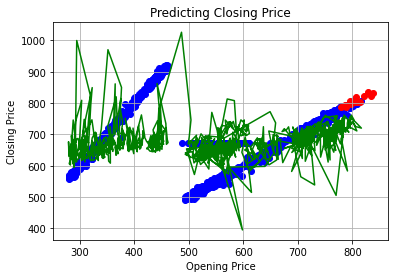

In [8]:
#validating result
plt.grid()
plt.title("Predicting Closing Price")
plt.ylabel("Closing Price")
plt.xlabel("Opening Price")

plt.scatter(dataset[['Open']], dataset[['Close']], color='blue') #train data
plt.scatter(testset[['Open']], testset[['Close']], color='red') #test data
plt.plot(dataset[['Open']], y_model, color='green') #linear regression line
plt.show()